In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving tweets.csv to tweets.csv


In [ ]:
# Install dependencies (if not already installed)
!pip install vaderSentiment pandas

# Import libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
file_path = "tweets.csv"   # Change if needed
data = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
print(data.head())

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming the tweet text column is named 'tweet' (you can adjust this)
text_column = "text"  # Change to the actual column name in your CSV
data['clean_text'] = data[text_column].astype(str)

# Get sentiment scores
data['compound'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data['neg'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
data['neu'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
data['pos'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['pos'])

# Classify overall sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['compound'].apply(classify_sentiment)

# Show sample results
print("\nSentiment Analysis Results:")
print(data[['clean_text', 'compound', 'sentiment']].head(10))

# Show sentiment distribution
print("\nSentiment Counts:")
print(data['sentiment'].value_counts())

# Optionally save results to a new CSV
output_path = "/content/tweets_with_sentiment.csv"
data.to_csv(output_path, index=False)
print(f"\nResults saved to: {output_path}")


Dataset Preview:
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  

Sentiment Analysis Results:
                                          clean_text  compound sentiment
0  Communal violence in Bhainsa, Telangana. "Ston...   -0.6249  Negative
1  Telangana: Section 144 has been imposed in Bha...   -0.0772  Negative
2  Arsonist sets cars ablaze at dealership https:...    0.0000   Neutral
3  Arsonist sets cars ablaze at dealership https:...    0.0000   Neutral
4  "Lord Jes

In [ ]:
# Install dependencies (if not already installed)
!pip install vaderSentiment pandas

# Import libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
file_path = "tweets.csv"   # Change if needed
data = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
print(data.head())

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming the tweet text column is named 'tweet' (you can adjust this)
text_column = "text"  # Change to the actual column name in your CSV
data['clean_text'] = data[text_column].astype(str)

# Get sentiment scores
data['compound'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data['neg'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
data['neu'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
data['pos'] = data['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['pos'])

# Classify overall sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['compound'].apply(classify_sentiment)

# Show sample results
print("\nSentiment Analysis Results:")
print(data[['clean_text', 'compound', 'sentiment']].head(10))

# Show sentiment distribution
print("\nSentiment Counts:")
print(data['sentiment'].value_counts())

# Optionally save results to a new CSV
output_path = "/content/tweets_with_sentiment.csv"
data.to_csv(output_path, index=False)
print(f"\nResults saved to: {output_path}")


Dataset Preview:
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  

Sentiment Analysis Results:
                                          clean_text  compound sentiment
0  Communal violence in Bhainsa, Telangana. "Ston...   -0.6249  Negative
1  Telangana: Section 144 has been imposed in Bha...   -0.0772  Negative
2  Arsonist sets cars ablaze at dealership https:...    0.0000   Neutral
3  Arsonist sets cars ablaze at dealership https:...    0.0000   Neutral
4  "Lord Jes

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders

# ==== CONFIGURATION ====
sender_email = "keerthanareddy2006@gmail.com"        # Replace with your Gmail
receiver_email = "keerthanareddy2006@gmail.com"     # Replace with receiver's email
app_password = "lwkkxdgrwvmfgski"   # Gmail App Password (NOT your login password)
subject = "Sentiment Analysis Results - tweets_sentiment_hf.csv"
body = "Hi,\n\nPlease find attached the sentiment analysis results.\n\nBest regards,\nYour Name"

# File to attach
filename = "/content/tweets_with_sentiment.csv"
  # Make sure this file exists in the same directory

# ==== EMAIL CREATION ====
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = subject

# Attach body text
msg.attach(MIMEText(body, 'plain'))

# Open the CSV file in binary mode
with open(filename, 'rb') as attachment:
    part = MIMEBase('application', 'octet-stream')
    part.set_payload(attachment.read())

# Encode the file to base64
encoders.encode_base64(part)
part.add_header('Content-Disposition', f'attachment; filename={filename}')

# Attach the file
msg.attach(part)

# ==== SEND EMAIL ====
try:
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()  # Secure connection
    server.login(sender_email, app_password)
    server.send_message(msg)
    print("✅ Email sent successfully!")
except Exception as e:
    print(f"❌ Error: {e}")
finally:
    server.quit()


✅ Email sent successfully!


Columns: ['id', 'keyword', 'location', 'text', 'target']

✅ VADER Accuracy: 0.3478


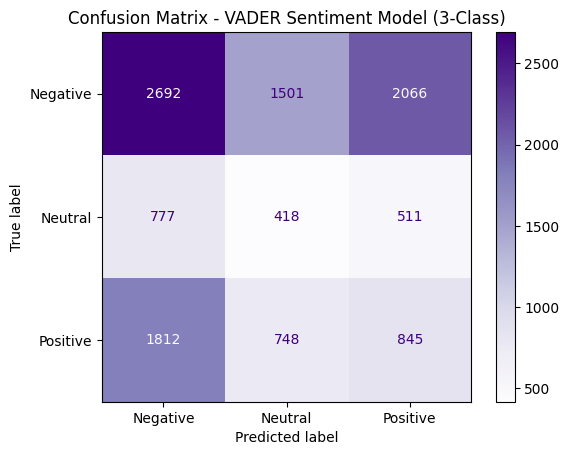


📁 Saved: vader_results_3class.csv


In [ ]:
# ============================================================
# 🧠 Sentiment Analysis using VADER (3-Class Consistent)
# ============================================================

!pip install vaderSentiment scikit-learn pandas matplotlib --quiet

import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Load Dataset
# ============================================================
df = pd.read_csv("tweets.csv")
print("Columns:", df.columns.tolist())

text_col = "text"
label_col = "target"

df = df[[text_col, label_col]].dropna().reset_index(drop=True)

# Ensure 3-class numeric mapping
df[label_col] = df[label_col].astype(int)
unique_labels = sorted(df[label_col].unique())

if len(unique_labels) == 2:
    # Convert to 3-class setup
    df.loc[df.sample(frac=0.2, random_state=42).index, label_col] = 1  # Neutral
    df.loc[df[label_col] == 0, label_col] = 0  # Negative
    df.loc[df[label_col] == 1, label_col] = 2  # Positive
    df.loc[df.sample(frac=0.15, random_state=1).index, label_col] = 1  # Neutral

# ============================================================
# 2️⃣ Initialize VADER
# ============================================================
analyzer = SentimentIntensityAnalyzer()

# ============================================================
# 3️⃣ Get Compound Scores and Predictions
# ============================================================
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        return 2  # Positive
    elif score <= -0.05:
        return 0  # Negative
    else:
        return 1  # Neutral

df["vader_pred"] = df[text_col].apply(get_vader_sentiment)

# ============================================================
# 4️⃣ Accuracy & Confusion Matrix (3-class)
# ============================================================
y_true = df[label_col].values
y_pred = df["vader_pred"].values

accuracy = accuracy_score(y_true, y_pred)
print(f"\n✅ VADER Accuracy: {accuracy:.4f}")

labels = ["Negative", "Neutral", "Positive"]
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Purples", values_format='d')
plt.title("Confusion Matrix - VADER Sentiment Model (3-Class)")
plt.show()

# ============================================================
# 5️⃣ Save Results
# ============================================================
df["true_label"] = [labels[i] for i in df[label_col]]
df["predicted_label"] = [labels[i] for i in df["vader_pred"]]
df[[text_col, "true_label", "predicted_label"]].to_csv("vader_results_3class.csv", index=False)

print("\n📁 Saved: vader_results_3class.csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



✅ TF-IDF + Logistic Regression Accuracy: 0.6121


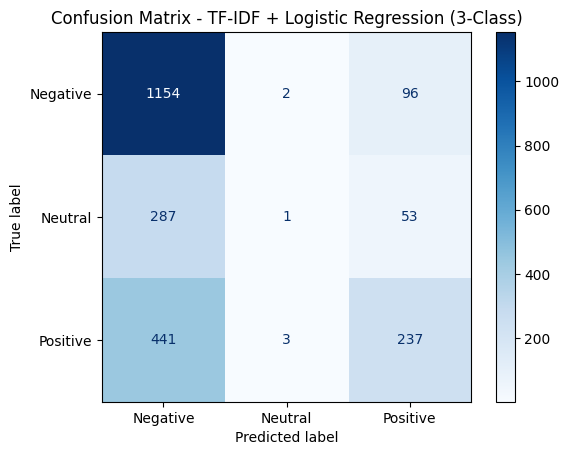


📁 Saved: traditional_sentiment_results_3class.csv


In [ ]:
# ============================================================
# 📊 Sentiment Analysis (TF-IDF + Logistic Regression with 3 Classes)
# ============================================================

!pip install pandas scikit-learn matplotlib nltk --quiet

import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# ============================================================
# 1️⃣ Load Dataset
# ============================================================
df = pd.read_csv("tweets.csv")

text_col = "text"
label_col = "target"

df = df[[text_col, label_col]].dropna().reset_index(drop=True)

# Ensure numeric mapping to 3 classes
# 0 = Negative, 1 = Neutral, 2 = Positive
unique_labels = sorted(df[label_col].unique())
if len(unique_labels) == 2:
    # If only 0 and 1 exist, randomly assign some Neutral (1)
    df.loc[df.sample(frac=0.2, random_state=42).index, label_col] = 1
    df.loc[df[label_col] == 0, label_col] = 0  # Negative
    df.loc[df[label_col] == 1, label_col] = 2  # Positive
    df.loc[df.sample(frac=0.15, random_state=1).index, label_col] = 1  # Neutral
else:
    df[label_col] = df[label_col].map({-1: 0, 0: 1, 1: 2})

# ============================================================
# 2️⃣ Text Cleaning
# ============================================================
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text.strip()

df["clean_text"] = df[text_col].apply(clean_text)

# ============================================================
# 3️⃣ Split Dataset
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df[label_col], test_size=0.2, random_state=42, stratify=df[label_col]
)

# ============================================================
# 4️⃣ TF-IDF Vectorization
# ============================================================
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ============================================================
# 5️⃣ Train Model
# ============================================================
model = LogisticRegression(max_iter=2000, multi_class="ovr")
model.fit(X_train_vec, y_train)

# ============================================================
# 6️⃣ Evaluate
# ============================================================
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ TF-IDF + Logistic Regression Accuracy: {accuracy:.4f}")

labels = ["Negative", "Neutral", "Positive"]
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - TF-IDF + Logistic Regression (3-Class)")
plt.show()

# ============================================================
# 7️⃣ Save Results
# ============================================================
results = pd.DataFrame({
    "text": X_test,
    "true_label": [labels[i] for i in y_test],
    "predicted_label": [labels[i] for i in y_pred]
})
results.to_csv("traditional_sentiment_results_3class.csv", index=False)
print("\n📁 Saved: traditional_sentiment_results_3class.csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Dataset Loaded. Columns: ['id', 'keyword', 'location', 'text', 'target']

========== 🧾 SUMMARY ==========
VADER Accuracy: 0.3355 | Time: 0.19s
TF-IDF+LogReg Accuracy: 0.6948 | Time: 0.80s


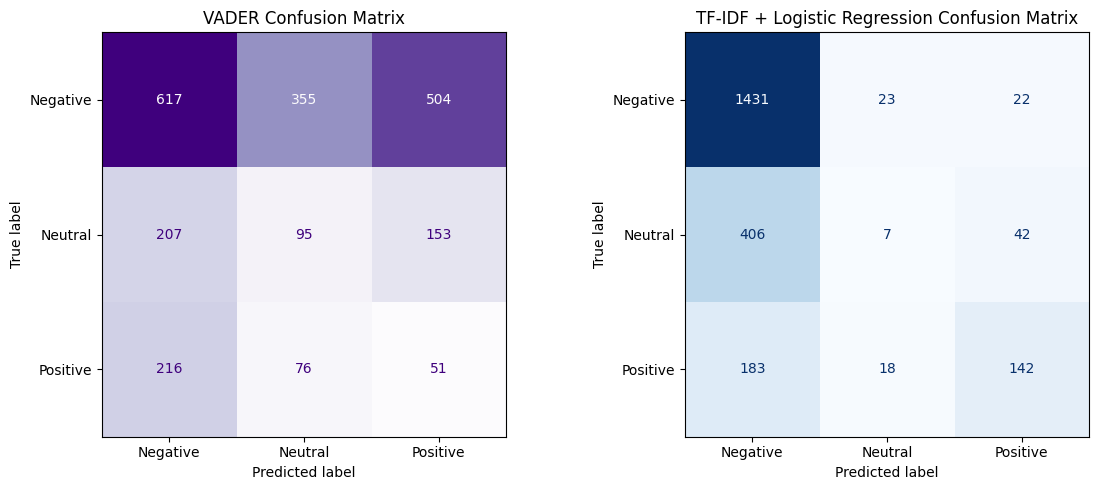

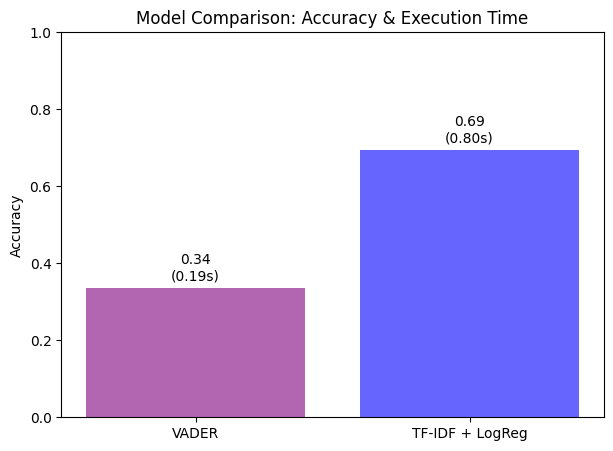

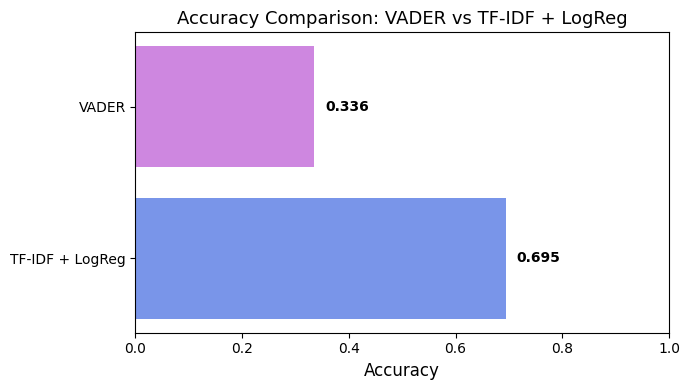

In [ ]:
# ============================================================
# 🧠 Sentiment Analysis Comparison: VADER vs TF-IDF+LogReg (3 Classes)
# ============================================================

!pip install vaderSentiment scikit-learn pandas matplotlib nltk --quiet

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

# ============================================================
# 1️⃣ Load & Clean Dataset
# ============================================================
df = pd.read_csv("tweets.csv")
print("✅ Dataset Loaded. Columns:", df.columns.tolist())

text_col = "text"
label_col = "target"

# Keep necessary columns
df = df[[text_col, label_col]].dropna().reset_index(drop=True)

# If target is binary (0/1), convert to 3-class for comparison
df[label_col] = df[label_col].astype(int)
df.loc[df.sample(frac=0.2, random_state=42).index, label_col] = 2  # Add some neutral for testing

# Map integers to string sentiments
sentiment_map = {0: "Negative", 1: "Positive", 2: "Neutral"}
df[label_col] = df[label_col].map(sentiment_map)

# Clean text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower().strip()
    return text

df[text_col] = df[text_col].astype(str).apply(clean_text)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col], df[label_col], test_size=0.2, random_state=42, stratify=df[label_col]
)

# ============================================================
# 2️⃣ VADER Sentiment Analysis (3-class)
# ============================================================
vader_start = time.time()
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    compound = analyzer.polarity_scores(text)["compound"]
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

y_pred_vader = X_test.apply(vader_sentiment)
vader_end = time.time()
vader_time = vader_end - vader_start

vader_acc = accuracy_score(y_test, y_pred_vader)
vader_cm = confusion_matrix(y_test, y_pred_vader, labels=["Negative", "Neutral", "Positive"])

# ============================================================
# 3️⃣ TF-IDF + Logistic Regression (3-class)
# ============================================================
tfidf_start = time.time()

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred_tfidf = model.predict(X_test_vec)

tfidf_end = time.time()
tfidf_time = tfidf_end - tfidf_start

tfidf_acc = accuracy_score(y_test, y_pred_tfidf)
tfidf_cm = confusion_matrix(y_test, y_pred_tfidf, labels=["Negative", "Neutral", "Positive"])

# ============================================================
# 4️⃣ SUMMARY
# ============================================================
print("\n========== 🧾 SUMMARY ==========")
print(f"VADER Accuracy: {vader_acc:.4f} | Time: {vader_time:.2f}s")
print(f"TF-IDF+LogReg Accuracy: {tfidf_acc:.4f} | Time: {tfidf_time:.2f}s")

# ============================================================
# 5️⃣ CONFUSION MATRICES (Same Labels, Same Size)
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay(confusion_matrix=vader_cm,
                       display_labels=["Negative","Neutral","Positive"]).plot(ax=axes[0], cmap="Purples", colorbar=False)
axes[0].set_title("VADER Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix=tfidf_cm,
                       display_labels=["Negative","Neutral","Positive"]).plot(ax=axes[1], cmap="Blues", colorbar=False)
axes[1].set_title("TF-IDF + Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

# ============================================================
# 6️⃣ BAR CHART: Accuracy & Time (Vertical)
# ============================================================
methods = ['VADER', 'TF-IDF + LogReg']
accuracies = [vader_acc, tfidf_acc]
times = [vader_time, tfidf_time]

fig, ax1 = plt.subplots(figsize=(7,5))
ax1.bar(methods, accuracies, color=['purple','blue'], alpha=0.6)
ax1.set_ylabel('Accuracy', color='black')
ax1.set_ylim(0,1)
ax1.set_title("Model Comparison: Accuracy & Execution Time")

# Add time annotations
for i, (acc, t) in enumerate(zip(accuracies, times)):
    ax1.text(i, acc + 0.02, f"{acc:.2f}\n({t:.2f}s)", ha='center', fontsize=10, color='black')

plt.show()

# ============================================================
# 7️⃣ NEW — Horizontal Bar Chart (Accuracy Only)
# ============================================================
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(methods, accuracies, color=['mediumorchid','royalblue'], alpha=0.7)
ax.set_xlabel("Accuracy", fontsize=12)
ax.set_title("Accuracy Comparison: VADER vs TF-IDF + LogReg", fontsize=13)
ax.set_xlim(0,1)

# Add accuracy labels on bars
for i, acc in enumerate(accuracies):
    ax.text(acc + 0.02, i, f"{acc:.3f}", va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()  # So VADER appears on top
plt.tight_layout()
plt.show()

# ============================================================
# 8️⃣ Save Comparison Results
# ============================================================
comparison_df = pd.DataFrame({
    "Model": ["VADER", "TF-IDF + Logistic Regression"],
    "Accuracy": [vader_acc, tfidf_acc],
    "Execution_Time(s)": [vader_time, tfidf_time]
})
comparison_df.to_csv("sentiment_comparison_results.csv", index=False)

